# Keras TF 2.0 - Classification

Classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

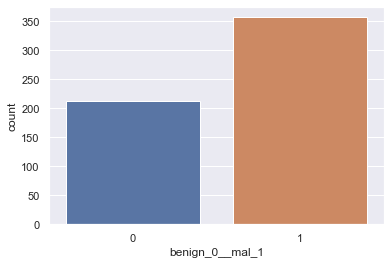

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)

# more malignant than benign but the difference is not extreme

<AxesSubplot:>

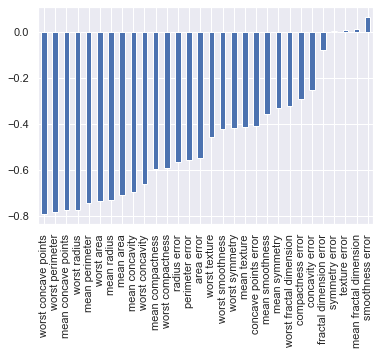

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

# high negative correlations

## Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['benign_0__mal_1'], axis = 1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.25, random_state = 101)

## Scaling Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

### Example One: Choosing too many epochs and overfitting

In [16]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 42ms/step - loss: 0.7171 - val_loss: 0.6787
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6794 - val_loss: 0.6518
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6438 - val_loss: 0.6189
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6068 - val_loss: 0.5809
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5697 - val_loss: 0.5365
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5164 - val_loss: 0.4839
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4674 - val_loss: 0.4316
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4232 - val_loss: 0.3801
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3697 - val_loss: 0.3347
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3318 - val_loss: 0.2970
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0902
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0494 - val_loss: 0.0970
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.0963
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.0905
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0670 - val_loss: 0.0945
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.0937
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.0959
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.0944
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0444 - val_loss: 0.0955
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.0938
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.1063
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.0980
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.0974
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1085
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0498 - val_loss: 0.0980
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.1036
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0991
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.1114
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0437 - val_loss: 0.1014
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.0985
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1187
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1067
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.1146
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1109
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.1057
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1128
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.1105
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1051
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.1177
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.1041
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.1159
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1274
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.1168
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.1259
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.1285
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1616
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1121
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.1443
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.1094
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1421
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.1343
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.1682
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.1401
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.1519
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.1467
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1425
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.1447
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1542
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1409
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.1619
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.1882
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.1722
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.1868
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.1743
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.1832
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.1818
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.1717
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.1839
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.1870
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1928
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.2247
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.2238
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.2302
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2200
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.2386
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.2360
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.2359
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.2242
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2300
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.2180
Epoc

In [17]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.709362,0.678702
1,0.670900,0.651800
2,0.636595,0.618879
3,0.601201,0.580885
4,0.558044,0.536453


<AxesSubplot:>

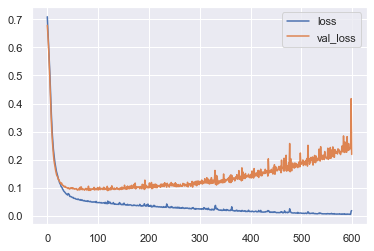

In [18]:
losses.plot()

# You can see OVERFITTING as validation loss starts to increase.
# Early stopping can fix this.

## Example Two: Early Stopping

In [19]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [22]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
                callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6795 - val_loss: 0.6688
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6565 - val_loss: 0.6380
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6303 - val_loss: 0.5980
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5674 - val_loss: 0.5522
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5363 - val_loss: 0.5044
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4842 - val_loss: 0.4500
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4294 - val_loss: 0.3967
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3765 - val_loss: 0.3493
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3650 - val_loss: 0.3097
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3098 - val_loss: 0.2768
Epoch 11

<AxesSubplot:>

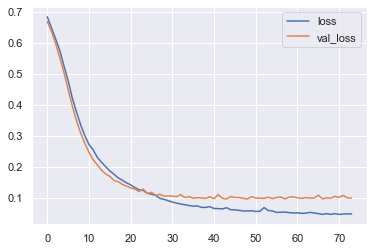

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [24]:
from tensorflow.keras.layers import Dropout

In [25]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [26]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test),
                callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7010 - val_loss: 0.6706
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6732 - val_loss: 0.6440
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6449 - val_loss: 0.6142
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6334 - val_loss: 0.5862
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5965 - val_loss: 0.5598
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5861 - val_loss: 0.5353
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6090 - val_loss: 0.5120
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5592 - val_loss: 0.4787
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5027 - val_loss: 0.4412
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5010 - val_loss: 0.4127
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0914 - val_loss: 0.1083
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1464 - val_loss: 0.1084
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1115 - val_loss: 0.0915
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1218 - val_loss: 0.0884
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1123 - val_loss: 0.1081
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1447 - val_loss: 0.0950
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1165 - val_loss: 0.0987
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0988 - val_loss: 0.0859
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1210 - val_loss: 0.0879
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.1046
Epoch 93/600


In [27]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

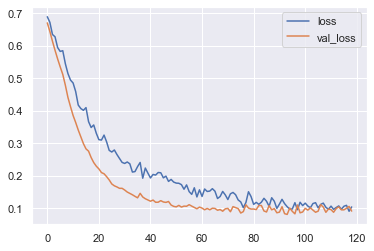

In [28]:
model_loss.plot()

## Model Evaluation

In [29]:
predictions = np.where(model.predict(X_test) > 0.5, 1, 0)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [32]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
